In [17]:
#Use a K-nearest neighbours classifier to predict whether the patients have diabetes or not
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
import sklearn

In [18]:
#load the data
df_main = pd.read_csv('/Users/ojasbardiya/Downloads/datasets_228_482_diabetes.csv')

In [19]:
#output the first 5 columns
df_main.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
#find the dimensions
df_main.shape

(768, 9)

In [21]:
#determine the basic statistics for each column in the dataframe
df_main.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
#check if there are any missing values
df_main.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
#replace instances of zero in the following columns  - Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, and
#Age with a null value 
df_main_copy = df_main.copy(deep = True)
df_main_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']] = df_main_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']].replace(0, np.NaN)

In [24]:
#print null values
df_main_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

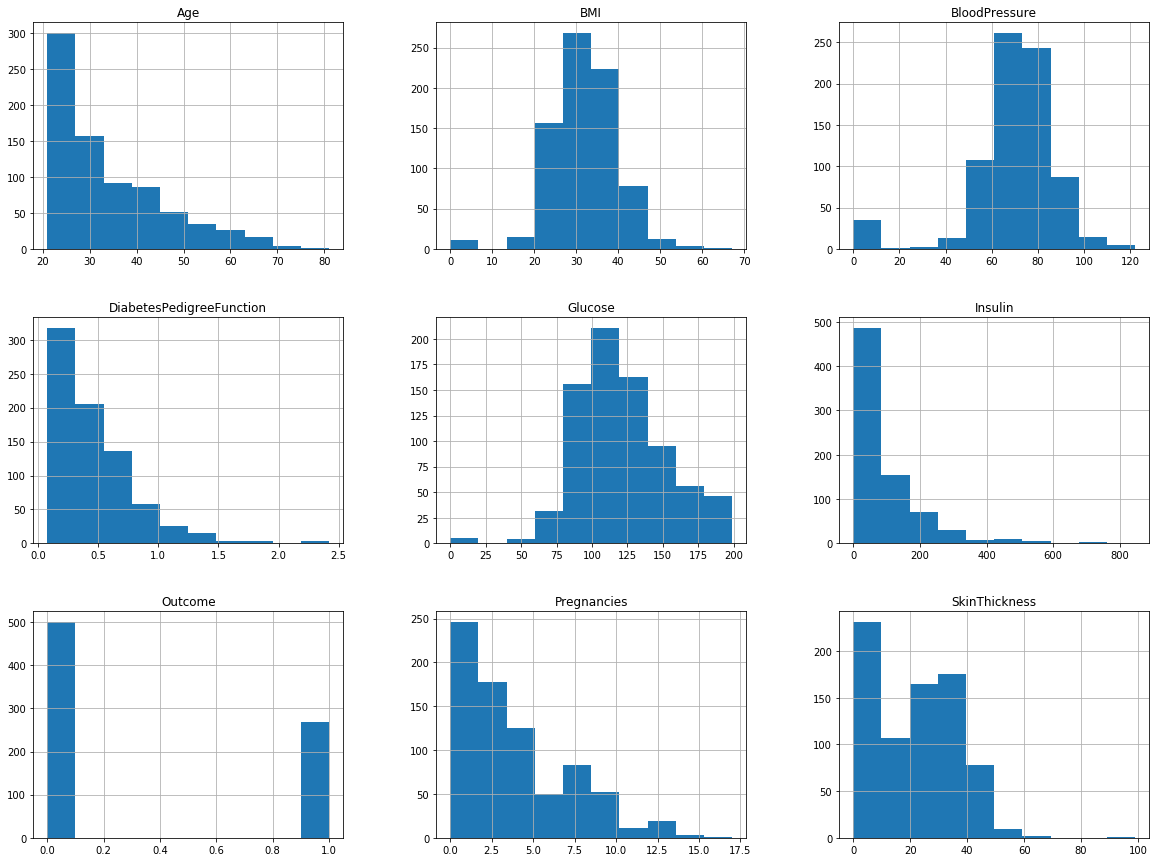

In [25]:
#visualizing data before removing/replacing null (zero) values
#each variable vs diabetes case count
plots = df_main.hist(figsize = (20, 15))

In [26]:
#Filter according to whether the Outcome is 0 (false) or 1 (true)
df_has_diabetes = df_main[df_main.Outcome == 1]
df_no_diabetes = df_main[df_main.Outcome == 0]

Text(0.5, 1.0, 'Variation of positive diabetes cases vs Age')

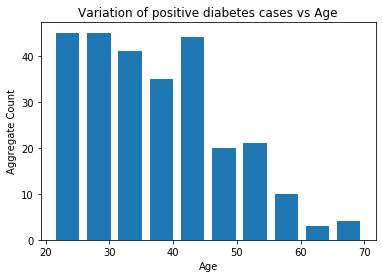

In [28]:
#Distribution of age vs positive cases of diabetes
plt.hist(df_has_diabetes.Age,rwidth=0.75)
plt.xlabel('Age')
plt.ylabel('Aggregate Count')
plt.title('Variation of positive diabetes cases vs Age')

Text(0.5, 1.0, 'Variation of negative diabetes cases vs Age')

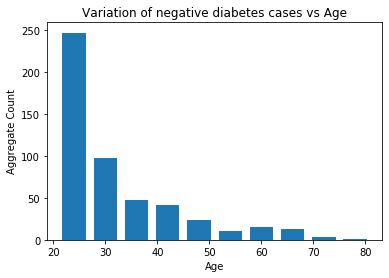

In [29]:
#Distribution of age vs negative cases of diabetes
plt.hist(df_no_diabetes.Age,rwidth=0.75)
plt.xlabel('Age')
plt.ylabel('Aggregate Count')
plt.title('Variation of negative diabetes cases vs Age')

In [45]:

group1 = (df_has_diabetes.groupby('Age')['Age'].agg('count'))/df_main.groupby('Age')['Age'].agg('count')
group1

Age
21    0.079365
22    0.152778
23    0.184211
24    0.173913
25    0.291667
26    0.242424
27    0.250000
28    0.285714
29    0.448276
30    0.285714
31    0.541667
32    0.562500
33    0.588235
34    0.285714
35    0.500000
36    0.625000
37    0.315789
38    0.625000
39    0.250000
40    0.461538
41    0.590909
42    0.388889
43    0.846154
44    0.625000
45    0.533333
46    0.538462
47    0.666667
48    0.200000
49    0.600000
50    0.625000
51    0.625000
52    0.875000
53    0.800000
54    0.666667
55    0.250000
56    0.666667
57    0.200000
58    0.428571
59    0.666667
60    0.400000
61    0.500000
62    0.500000
63         NaN
64         NaN
65         NaN
66    0.500000
67    0.333333
68         NaN
69         NaN
70    1.000000
72         NaN
81         NaN
Name: Age, dtype: float64

Text(0.5, 1.0, 'Variation of positive diabetes cases vs BMI')

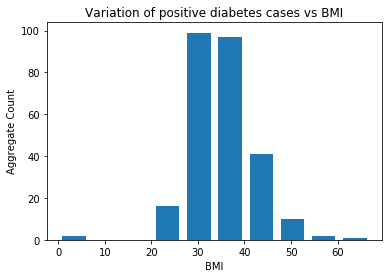

In [46]:
plt.hist(df_has_diabetes.BMI,rwidth=0.75)
plt.xlabel('BMI')
plt.ylabel('Aggregate Count')
plt.title('Variation of positive diabetes cases vs BMI')

Text(0.5, 1.0, 'Variation of negative diabetes cases vs BMI')

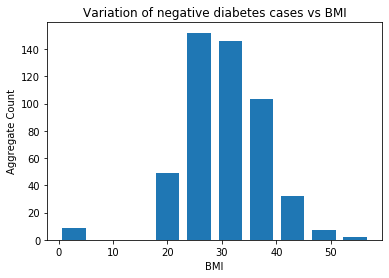

In [51]:
plt.hist(df_no_diabetes.BMI,rwidth=0.75)
plt.xlabel('BMI')
plt.ylabel('Aggregate Count')
plt.title('Variation of negative diabetes cases vs BMI')

Text(0.5, 1.0, 'Variation of negative diabetes cases vs Skin Thickness')

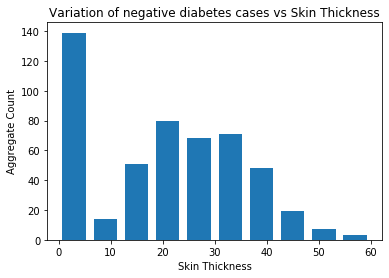

In [49]:
plt.hist(df_no_diabetes.SkinThickness,rwidth=0.75)
plt.xlabel('Skin Thickness')
plt.ylabel('Aggregate Count')
plt.title('Variation of negative diabetes cases vs Skin Thickness')

Text(0.5, 1.0, 'Variation of positive diabetes cases vs Skin Thickness')

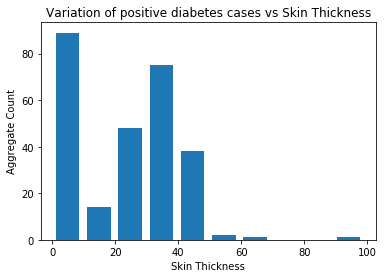

In [52]:
plt.hist(df_has_diabetes.SkinThickness,rwidth=0.75)
plt.xlabel('Skin Thickness')
plt.ylabel('Aggregate Count')
plt.title('Variation of positive diabetes cases vs Skin Thickness')

Text(0.5, 1.0, 'Variation of positive diabetes cases vs Blood Pressure')

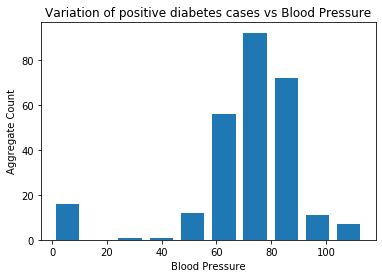

In [53]:
plt.hist(df_has_diabetes.BloodPressure,rwidth=0.75)
plt.xlabel('Blood Pressure')
plt.ylabel('Aggregate Count')
plt.title('Variation of positive diabetes cases vs Blood Pressure')

Text(0.5, 1.0, 'Variation of negative diabetes cases vs Blood Pressure')

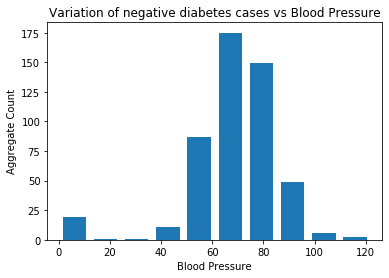

In [54]:
plt.hist(df_no_diabetes.BloodPressure,rwidth=0.75)
plt.xlabel('Blood Pressure')
plt.ylabel('Aggregate Count')
plt.title('Variation of negative diabetes cases vs Blood Pressure')

Text(0.5, 1.0, 'Variation of positive diabetes cases vs Glucose Level')

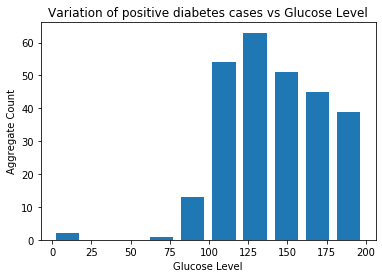

In [55]:
plt.hist(df_has_diabetes.Glucose,rwidth=0.75)
plt.xlabel('Glucose Level')
plt.ylabel('Aggregate Count')
plt.title('Variation of positive diabetes cases vs Glucose Level')

Text(0.5, 1.0, 'Variation of negative diabetes cases vs Glucose Level')

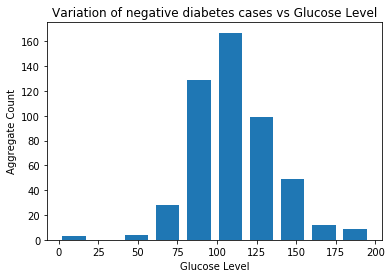

In [56]:
plt.hist(df_no_diabetes.Glucose,rwidth=0.75)
plt.xlabel('Glucose Level')
plt.ylabel('Aggregate Count')
plt.title('Variation of negative diabetes cases vs Glucose Level')

Text(0.5, 1.0, 'Variation of positive diabetes cases vs Insulin Level')

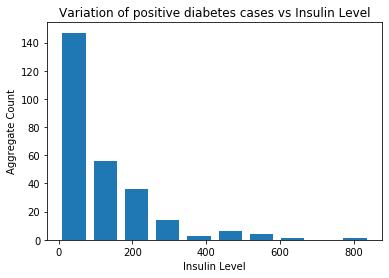

In [57]:
plt.hist(df_has_diabetes.Insulin,rwidth=0.75)
plt.xlabel('Insulin Level')
plt.ylabel('Aggregate Count')
plt.title('Variation of positive diabetes cases vs Insulin Level')

Text(0.5, 1.0, 'Variation of negative diabetes cases vs Insulin Level')

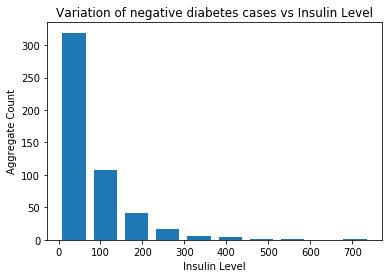

In [58]:
plt.hist(df_no_diabetes.Insulin,rwidth=0.75)
plt.xlabel('Insulin Level')
plt.ylabel('Aggregate Count')
plt.title('Variation of negative diabetes cases vs Insulin Level')

In [59]:
#Case I: We replace zero values with either the mean/median depending on the distribution

df_main_copy1 = df_main_copy.copy(deep=True)

#for approximate normal distributions, we fill null values with the mean
df_main_copy1['Glucose'].fillna(df_main_copy1['Glucose'].mean(), inplace = True)
df_main_copy1['BloodPressure'].fillna(df_main_copy1['BloodPressure'].mean(), inplace = True)
df_main_copy1['BMI'].fillna(df_main_copy1['BMI'].mean(), inplace = True)

#for right-skewed distributions we fill null values according to the median
df_main_copy1['SkinThickness'].fillna(df_main_copy1['SkinThickness'].median(), inplace = True)
df_main_copy1['Insulin'].fillna(df_main_copy1['Insulin'].median(), inplace = True)

In [60]:
#Case II: We drop all zero values
df_main_copy2 = df_main_copy.copy(deep=True)

df_main_copy2.dropna(inplace=True)

In [61]:
#check
df_main_copy2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [62]:
#check
df_main_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

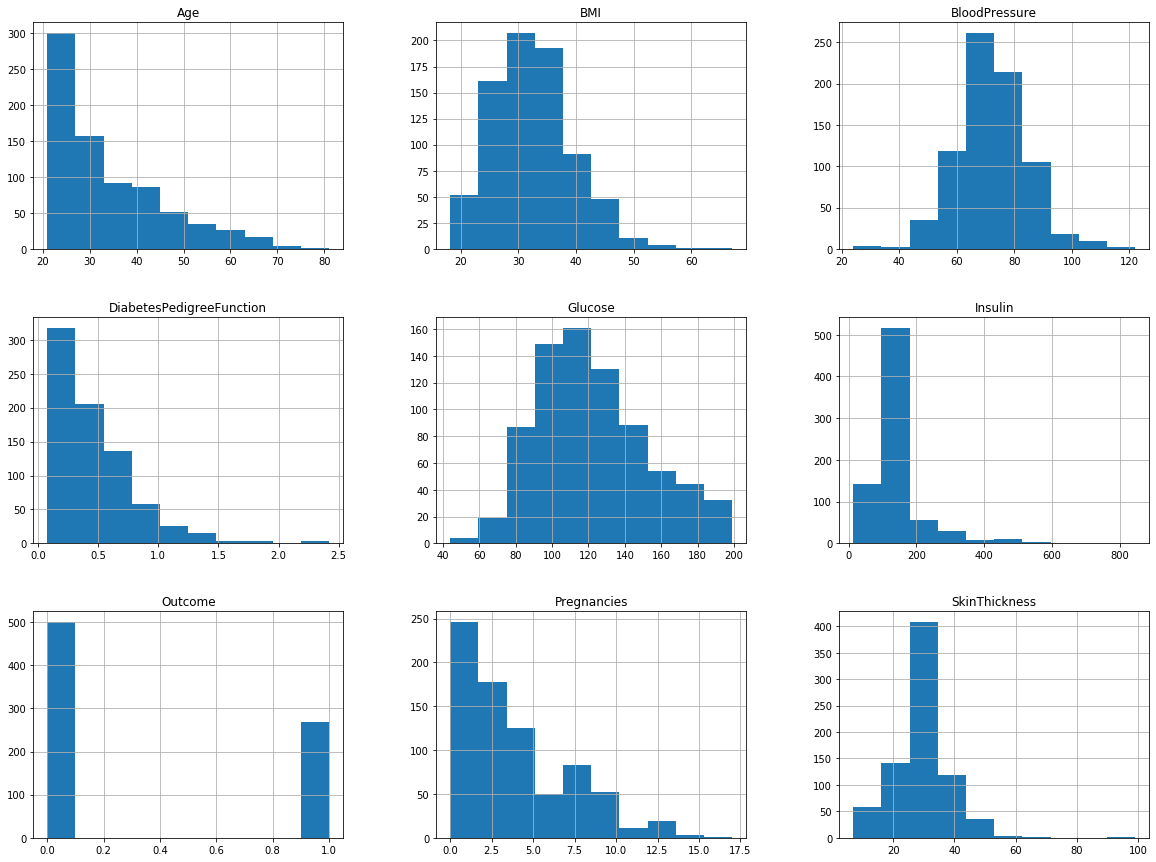

In [63]:
#Visualization after replacing null values with mean/median
plots = df_main_copy1.hist(figsize = (20, 15))

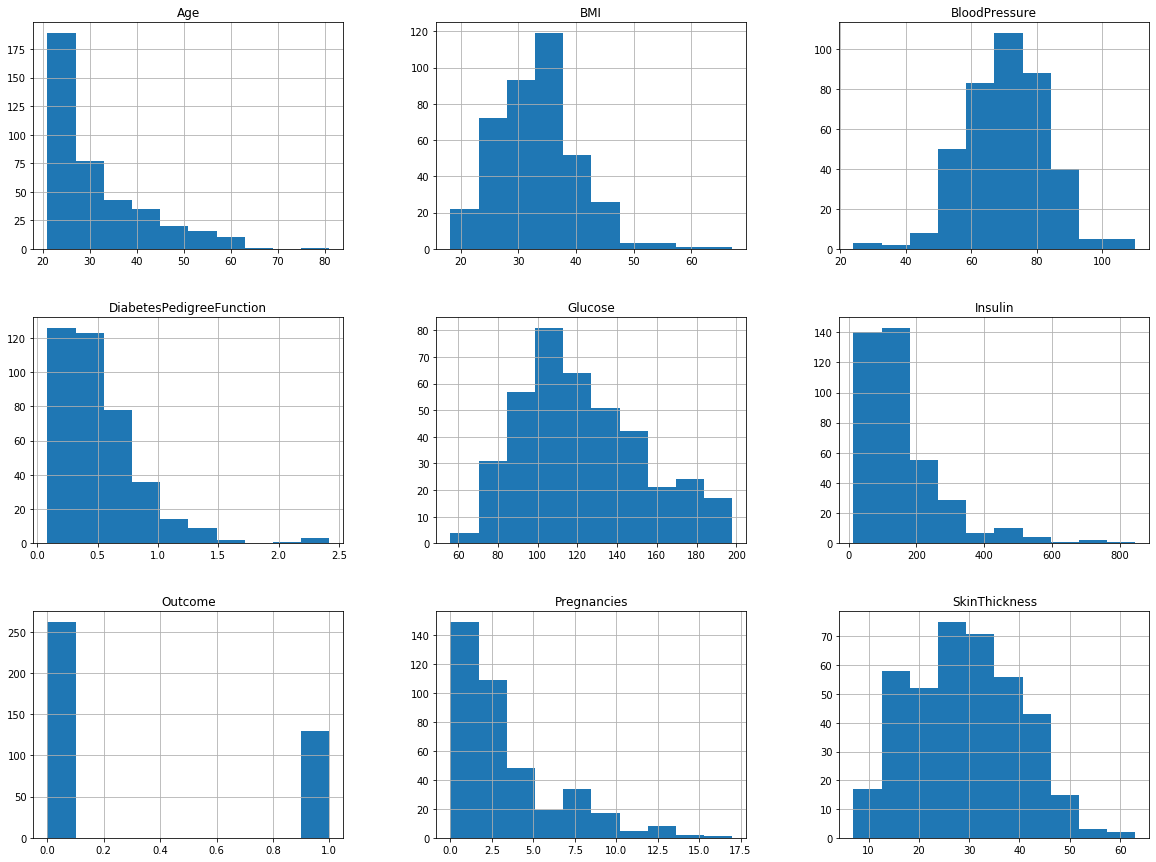

In [64]:
#Visualization after dropping null values 
plots = df_main_copy2.hist(figsize = (20, 15))

In [65]:
#Create set of predictor variables for Case I
X = df_main_copy1.drop(['Outcome'], axis=1).values

In [66]:
#Create response variable for Case I 
Y = df_main_copy1.Outcome

In [67]:
#Create the train and test data 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42, stratify=Y)

In [68]:
#Perform the K-nearest neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range (1, 12):
    KNN = KNeighborsClassifier(i)
    KNN.fit(X_train,Y_train)
    
    train_scores.append(KNN.score(X_train,Y_train))
    test_scores.append(KNN.score(X_test,Y_test))


Text(0.5, 1.0, 'Comparing Training and Test Data Accuracy')

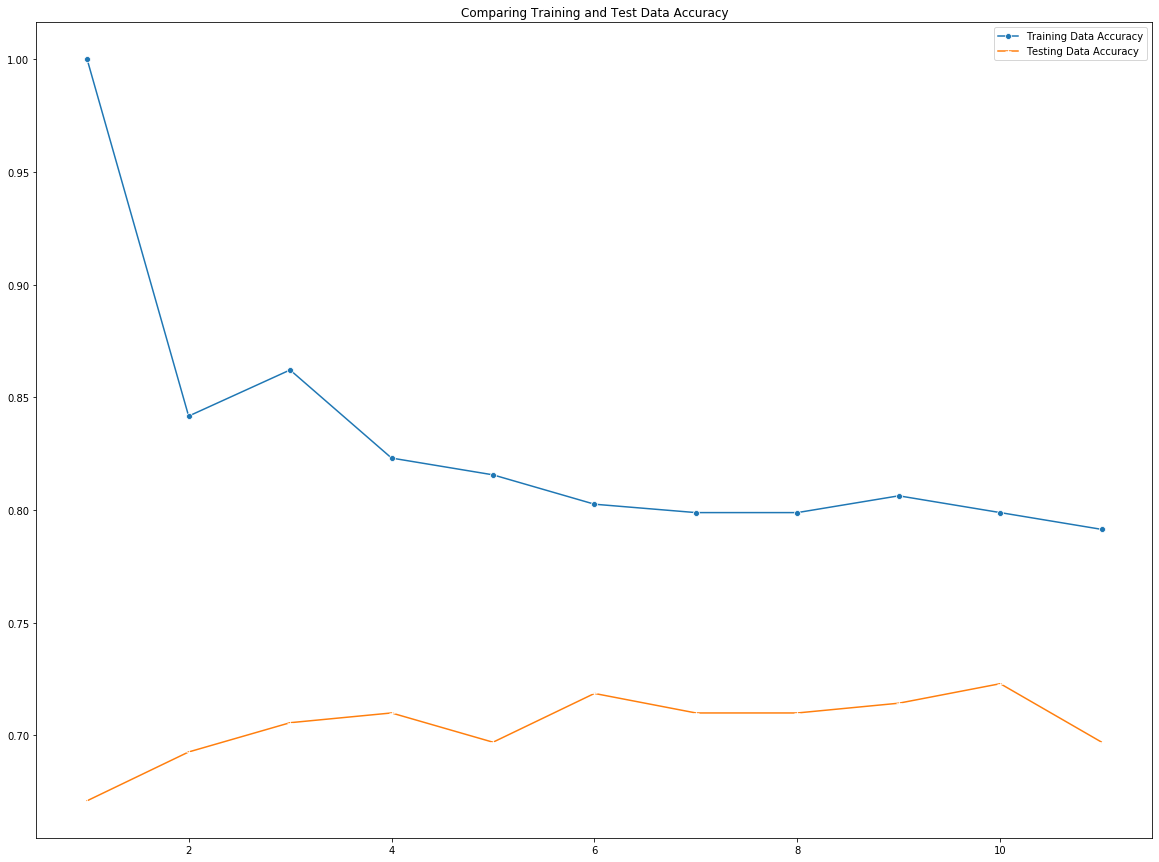

In [69]:
#Plot the training vs test error rate to determine the level of flexibility
plt.figure(figsize=(20,15))
final_plot = sns.lineplot(range(1,12),train_scores,marker='o',label='Training Data Accuracy')
final_plot = sns.lineplot(range(1,12),test_scores,marker='+',label='Testing Data Accuracy')
plt.title('Comparing Training and Test Data Accuracy')

In [70]:
#From the plot, we see that test accuracy is maximum for K = 10
#print out the accuracy
test_max = max(test_scores)
test_max

0.7229437229437229

In [71]:
#Perform the KNN Classification Algorithm with K = 10
KNN = KNeighborsClassifier(10)

KNN.fit(X_train,Y_train)
KNN.score(X_test,Y_test)

0.7229437229437229

In [72]:
#Describe the performance of the K-nearest neighbors classifier
from sklearn.metrics import confusion_matrix
Y_pred = KNN.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[126,  24],
       [ 40,  41]])

In [73]:
#Visualization of confusion matrix
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,126,24,150
1,40,41,81
All,166,65,231


In [74]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
KNN = KNeighborsClassifier()
KNN_cv= GridSearchCV(KNN,param_grid,cv=5)
KNN_cv.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [75]:
#Print out the values of highest test accuracy and value of K for which it happens
print(KNN_cv.best_score_, KNN_cv.best_params_)

0.7526041666666666 {'n_neighbors': 31}


In [76]:
#Create set of predictor variables for Case II
X2 = df_main_copy2.drop(['Outcome'], axis=1).values

In [77]:
#Create response variable for Case II
Y2 = df_main_copy2.Outcome

In [78]:
#Create the training and testing data
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2,test_size=0.3,random_state=42, stratify=Y2)

In [79]:
#Peform the K nearest neighbors algorithm
test_scores2 = []
train_scores2 = []

for i in range (1, 12):
    KNN = KNeighborsClassifier(i)
    KNN.fit(X2_train,Y2_train)
    
    train_scores2.append(KNN.score(X2_train,Y2_train))
    test_scores2.append(KNN.score(X2_test,Y2_test))

Text(0.5, 1.0, 'Comparing Training and Test Data Accuracy')

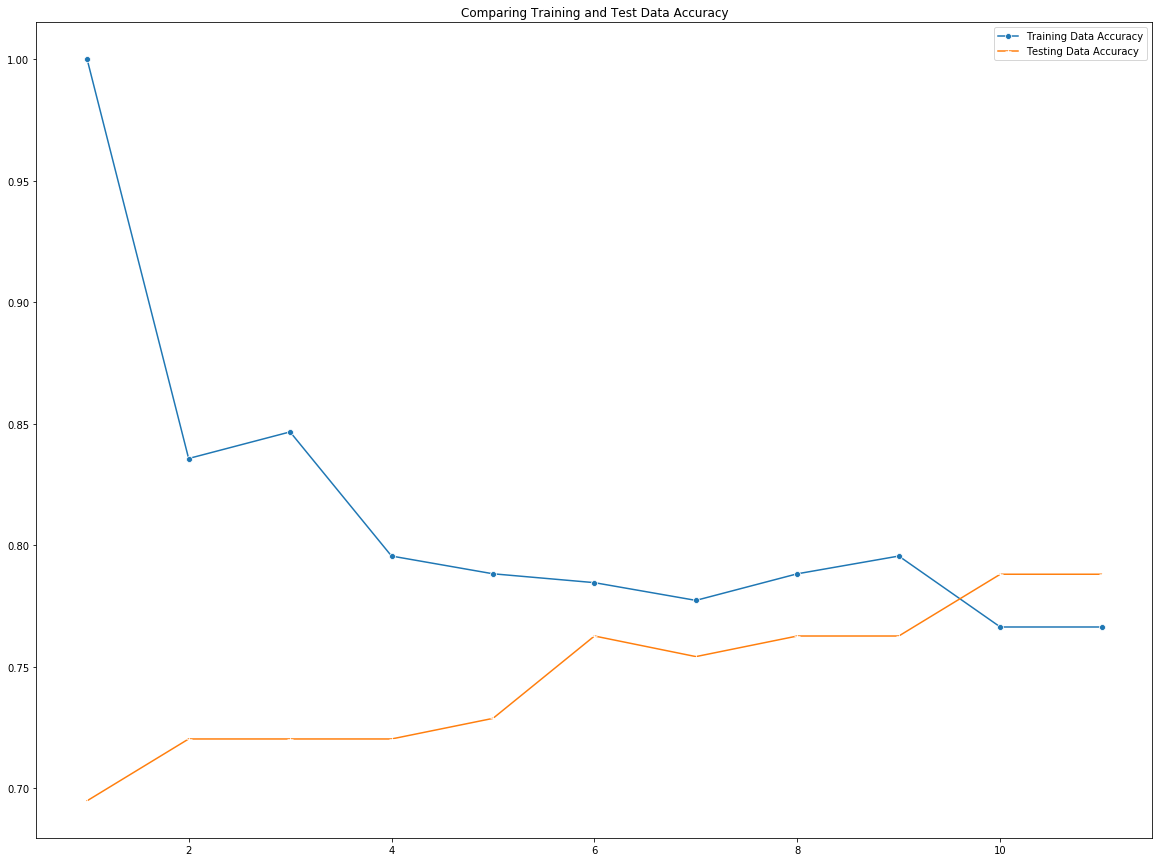

In [80]:
#Plot the training vs test error rate to determine the level of flexibility
plt.figure(figsize=(20,15))
final_plot = sns.lineplot(range(1,12),train_scores2,marker='o',label='Training Data Accuracy')
final_plot = sns.lineplot(range(1,12),test_scores2,marker='+',label='Testing Data Accuracy')
plt.title('Comparing Training and Test Data Accuracy')

In [81]:
#From the plot, we see that test accuracy is maximum for K = 10
#print out the accuracy
test_max2 = max(test_scores2)
test_max2

0.788135593220339

In [90]:
##Perform the KNN Classification Algorithm with K = 10
KNN = KNeighborsClassifier(10)

KNN.fit(X2_train,Y2_train)
KNN.score(X2_test,Y2_test)

0.788135593220339

In [83]:
#Describe the performance of the K-nearest neighbors classifier
Y2_pred = KNN.predict(X2_test)
confusion_matrix(Y2_test, Y2_pred)

array([[71,  8],
       [17, 22]])

In [84]:
#Visualization of confusion matrix
pd.crosstab(Y2_test, Y2_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,71,8,79
1,17,22,39
All,88,30,118
